In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

input_file = ''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        input_file = os.path.join(dirname, filename)
        print(input_file)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-grade-prediction/student-mat.csv


## Important Libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# moore libraries
import torch
import torch.nn as nn
import torch.nn.functional as F


import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

## Import Data

In [20]:
data = pd.read_csv(input_file)

data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data.info()
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Preprocessing data

### step 1: encoding non-numeric values

In [28]:
non_numeric_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
                       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                       'nursery', 'higher', 'internet', 'romantic']

# One-Hot Encoding
data_one_hot = pd.get_dummies(data, columns=non_numeric_columns)

# Label Encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_label_encoded = data.copy()
for column in non_numeric_columns:
    data_label_encoded[column] = label_encoder.fit_transform(data_label_encoded[column])

# Display the encoded data
print("One-Hot Encoded Data:")
print(data_one_hot.head())

print("\nLabel Encoded Data:")
print(data_label_encoded.head())


One-Hot Encoded Data:
   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  activities_no  activities_yes  nursery_no  nursery_yes  \
0     1  ...           True           False       False         True   
1     1  ...           True           False        True        False   
2     2  ...           True           False       False         True   
3     1  ...          False            True       False         True   
4     1  ...           True           False       False         True   

   higher_no  higher_yes  internet_no  internet_yes  romantic_no

In [29]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
data_one_hot

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,False,True,False,True,True,False,True,False
1,17,1,1,1,2,0,5,3,3,1,...,True,False,True,False,False,True,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,False,True,False,True,False,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,False,True,False,True,False,True,False,True,False,True
4,16,3,3,1,2,0,4,3,2,1,...,True,False,False,True,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2,2,1,2,2,5,5,4,4,...,True,False,False,True,False,True,True,False,True,False
391,17,3,1,2,1,0,2,4,5,3,...,True,False,True,False,False,True,False,True,True,False
392,21,1,1,1,1,3,5,5,3,3,...,True,False,True,False,False,True,True,False,True,False
393,18,3,2,3,1,0,4,4,1,3,...,True,False,True,False,False,True,False,True,True,False


In [30]:
data_label_encoded

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,0,0,1,1,1,2,2,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,10


In [31]:
data = data_label_encoded


### Split Data into X and y features

`X` will be a matrix of features while `y` will be a column vector of target attribute `G3`

In [32]:
y = data['G3'].copy()
X = data.drop('G3', axis=1).copy()
y


0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

## Visualizing data

### Visualize correlation of features with final grade(g3)

### Use Scatter plot of individual features

In [33]:
correlations = data.drop(columns=['G3']).corrwith(data['G3'])
correlations


school       -0.045017
sex           0.103456
age          -0.161579
address       0.105756
famsize       0.081407
Pstatus      -0.058009
Medu          0.217147
Fedu          0.152457
Mjob          0.102082
Fjob          0.042286
reason        0.121994
guardian     -0.070109
traveltime   -0.117142
studytime     0.097820
failures     -0.360415
schoolsup    -0.082788
famsup       -0.039157
paid          0.101996
activities    0.016100
nursery       0.051568
higher        0.182465
internet      0.098483
romantic     -0.129970
famrel        0.051363
freetime      0.011307
goout        -0.132791
Dalc         -0.054660
Walc         -0.051939
health       -0.061335
absences      0.034247
G1            0.801468
G2            0.904868
dtype: float64

In [34]:
# Select top 6 features with highest correlation with G3
# G3 is excluded from the correlation calculation
correlations = data.drop(columns=['G3']).corrwith(data['G3'])

# Select top-k features (excluding G3) with highest absolute correlation coefficients
top_k_features = correlations.abs().nlargest(15)
bottom_K = correlations.abs().nsmallest(15)
#print(top_k_features)
print(bottom_K)

freetime      0.011307
activities    0.016100
absences      0.034247
famsup        0.039157
Fjob          0.042286
school        0.045017
famrel        0.051363
nursery       0.051568
Walc          0.051939
Dalc          0.054660
Pstatus       0.058009
health        0.061335
guardian      0.070109
famsize       0.081407
schoolsup     0.082788
dtype: float64


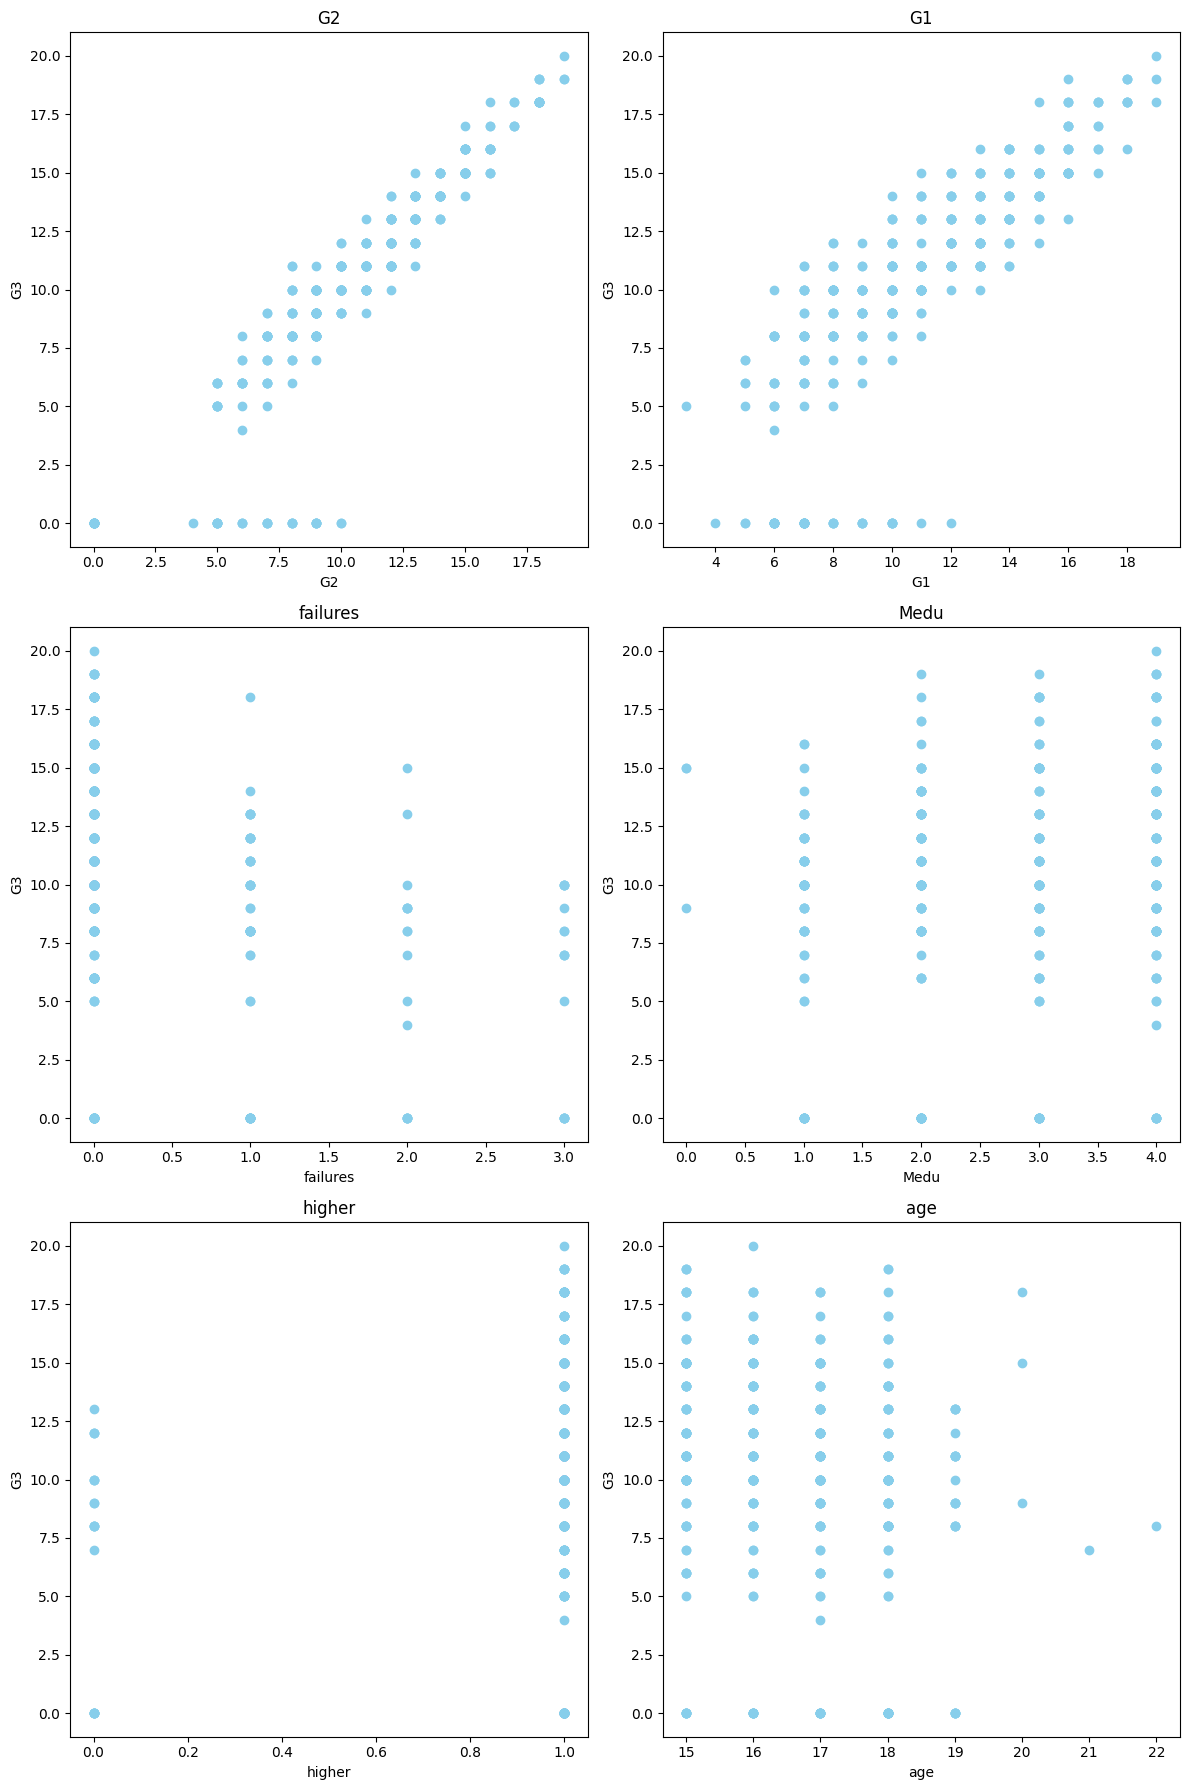

In [36]:
# plot the scatter plot graphs now

plt.figure(figsize=(12, 18))



# First subplot for feature1
plt.subplot(3, 2, 1)  # 3 rows, 2 columns, subplot index 1
plt.scatter(x=data['G2'], y=data['G3'], color='skyblue')
plt.title('G2')
plt.xlabel('G2')
plt.ylabel('G3')

# Second subplot for feature2
plt.subplot(3, 2, 2)  # 3 rows, 2 columns, subplot index 2
plt.scatter(x=data['G1'], y=data['G3'], color='skyblue')
plt.title('G1')
plt.xlabel('G1')
plt.ylabel('G3')

# Third subplot for feature3
plt.subplot(3, 2, 3)  # 3 rows, 2 columns, subplot index 3
plt.scatter(x=data['failures'], y=data['G3'], color='skyblue')
plt.title('failures')
plt.xlabel('failures')
plt.ylabel('G3')

# Fourth subplot for feature4
plt.subplot(3, 2, 4)  # 3 rows, 2 columns, subplot index 4
plt.scatter(x=data['Medu'], y=data['G3'], color='skyblue')
plt.title('Medu')
plt.xlabel('Medu')
plt.ylabel('G3')

# Fifth subplot for feature5
plt.subplot(3, 2, 5)  # 3 rows, 2 columns, subplot index 5
plt.scatter(x=data['higher'], y=data['G3'], color='skyblue')
plt.title('higher')
plt.xlabel('higher')
plt.ylabel('G3')

# Sixth subplot for feature6
plt.subplot(3, 2, 6)  # 3 rows, 2 columns, subplot index 6
plt.scatter(x=data['age'], y=data['G3'], color='skyblue')
plt.title('age')
plt.xlabel('age')
plt.ylabel('G3')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


## Drop some more columns

Let's see the columns with the lowest correlation:

In [37]:
correlations = data.drop(columns=['G3']).corrwith(data['G3'])

# Select bottom-k features (excluding G3) with lowest absolute correlation coefficients
top_k_features = correlations.abs().nlargest(15)
bottom_K = correlations.abs().nsmallest(15)

print(bottom_K)

freetime      0.011307
activities    0.016100
absences      0.034247
famsup        0.039157
Fjob          0.042286
school        0.045017
famrel        0.051363
nursery       0.051568
Walc          0.051939
Dalc          0.054660
Pstatus       0.058009
health        0.061335
guardian      0.070109
famsize       0.081407
schoolsup     0.082788
dtype: float64


In [39]:
new_data = data.drop(columns=['freetime', 'activities', 'absences', 'famsup', 'Fjob', 'school', 'famrel', 'nursery',
                             'Walc', 'Dalc', 'Pstatus', 'health', 'guardian', 'famsize', 'schoolsup'
                             ]).copy()
new_data

,sex,age,address,Medu,Fedu,Mjob,reason,traveltime,studytime,failures,paid,higher,internet,romantic,goout,G1,G2,G3
0,0,18,1,4,4,0,0,2,2,0,0,1,0,0,4,5,6,6
1,0,17,1,1,1,0,0,1,2,0,0,1,1,0,3,5,5,6
2,0,15,1,1,1,0,2,1,2,3,1,1,1,0,2,7,8,10
3,0,15,1,4,2,1,1,1,3,0,1,1,1,1,2,15,14,15
4,0,16,1,3,3,2,1,1,2,0,1,1,0,0,2,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,2,2,3,0,1,2,2,1,1,0,0,4,9,9,9
391,1,17,1,3,1,3,0,2,1,0,0,1,1,0,5,14,16,16
392,1,21,0,1,1,2,0,1,1,3,0,1,0,0,3,10,8,7
393,1,18,0,3,2,3,0,3,1,0,0,1,1,0,1,11,12,10


## Split Data into X and y features, and then scale it.

### Split data to `X` and `y`

In [42]:
y = new_data['G3'].copy()
X = new_data.drop('G3', axis=1).copy()
X

,sex,age,address,Medu,Fedu,Mjob,reason,traveltime,studytime,failures,paid,higher,internet,romantic,goout,G1,G2
0,0,18,1,4,4,0,0,2,2,0,0,1,0,0,4,5,6
1,0,17,1,1,1,0,0,1,2,0,0,1,1,0,3,5,5
2,0,15,1,1,1,0,2,1,2,3,1,1,1,0,2,7,8
3,0,15,1,4,2,1,1,1,3,0,1,1,1,1,2,15,14
4,0,16,1,3,3,2,1,1,2,0,1,1,0,0,2,6,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,20,1,2,2,3,0,1,2,2,1,1,0,0,4,9,9
391,1,17,1,3,1,3,0,2,1,0,0,1,1,0,5,14,16
392,1,21,0,1,1,2,0,1,1,3,0,1,0,0,3,10,8
393,1,18,0,3,2,3,0,3,1,0,0,1,1,0,1,11,12


In [43]:
y

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'frequency')

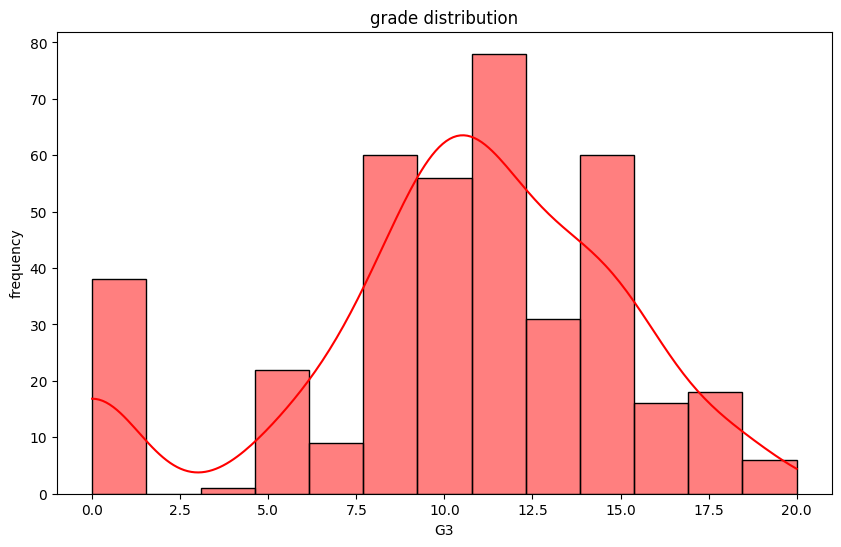

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, color='red')
plt.title('grade distribution')
plt.xlabel('G3')
plt.ylabel('frequency')

## Scale the data 
Scaling the data gives it each column in `X` a mean of 0 and standard deviation of 1

we'll use Scaler from sklearn

In [50]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

## **Split Data into training and testing, with 80%**

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

## **Training PyTorch Model**

Our data has 17 columns, so our model's first layer would have 17 input nodes.

Let's have 2 hidden layers with 34 nodes, 1 more hidden layer with 8 nodes, and 1 output layer.

In [53]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(17, 34)
        # 17 inputs and 34 outputs
        self.layer2 = nn.Linear(34, 34)
        # 34 inputs and 34 outputs
        self.layer3 = nn.Linear(34, 8)
        # 34 inputs and 8 outputs
        self.output = nn.Linear(8, 1)
        # 8 inputs and 1 output
    
    # define feed-forward function
    # it takes a feature vector
    def forward(self, x):
        # we use F from the functional package
        # we use it to pass relu function to the layers
        # now hidden layers have RELU activation function
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = self.output(x)
        return x

## Let's visualize our model:
let's see the parameter sizes of each layer

In [54]:
neuralNet = NeuralNetwork()

param_list = list(neuralNet.parameters())

for i in range(len(param_list)):
    print(param_list[i].shape)

torch.Size([34, 17])
torch.Size([34])
torch.Size([34, 34])
torch.Size([34])
torch.Size([8, 34])
torch.Size([8])
torch.Size([1, 8])
torch.Size([1])


## **Convert the X and y datas into Tensors**

In [61]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(np.array(y_train)).type(torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(np.array(y_test)).type(torch.float32)

In [62]:
X_train_tensor

tensor([[ 1.0547, -0.5463,  0.5354,  ...,  0.8015,  0.6308,  0.6085],
        [-0.9482,  1.8077,  0.5354,  ...,  0.8015, -0.2742, -0.4562],
        [ 1.0547, -1.3310,  0.5354,  ..., -0.0979, -0.2742, -0.1900],
        ...,
        [-0.9482, -1.3310, -1.8678,  ...,  0.8015, -0.8775, -1.2548],
        [ 1.0547, -0.5463,  0.5354,  ..., -0.0979,  0.0275, -0.4562],
        [ 1.0547, -0.5463, -1.8678,  ..., -0.0979,  1.2341,  1.4071]])

In [63]:
y_train_tensor

tensor([12.,  0., 11., 15., 11., 13., 10., 10., 13.,  0., 11., 14.,  0., 19.,
        10.,  0.,  8.,  9.,  6., 12., 18., 15.,  7.,  9., 14., 11., 18., 13.,
         6., 13., 14.,  9., 12.,  8., 11.,  8., 13., 10., 12., 11., 15., 16.,
        15., 14., 18., 16., 18.,  8.,  9., 14.,  7.,  9.,  0.,  9.,  8., 10.,
         0.,  8., 13., 16.,  0., 13., 12., 10., 13., 13., 15., 13., 14., 11.,
         6., 11., 11., 13., 15., 11.,  0., 12., 15., 10., 11.,  8., 18.,  0.,
         7., 13., 10.,  8.,  0., 10., 17.,  9., 11.,  0.,  5., 15., 19.,  9.,
        18.,  0., 12., 12., 10., 14., 15.,  9.,  9., 10., 14.,  0., 13., 15.,
        14.,  5., 15., 10., 19., 12.,  8., 14., 16.,  0., 11., 17., 10., 13.,
        16., 14., 14.,  9., 11., 12., 12.,  6., 11.,  9., 10.,  0., 11., 12.,
        12., 10.,  0., 10., 10.,  0., 13.,  6.,  7.,  0.,  5., 20., 19.,  6.,
        10., 11., 11., 15., 17.,  7., 16., 11., 10., 14.,  0.,  8., 11., 15.,
        12.,  9.,  0., 16., 14., 14., 16., 11.,  5., 11., 10., 1

In [64]:
X_test_tensor

tensor([[-0.9482, -1.3310,  0.5354,  ..., -0.9973, -1.4808, -0.9886],
        [-0.9482,  0.2384, -1.8678,  ...,  0.8015, -0.2742, -0.1900],
        [ 1.0547,  4.1617,  0.5354,  ...,  1.7009, -1.4808, -0.7224],
        ...,
        [-0.9482,  1.0230,  0.5354,  ..., -0.9973,  0.0275,  0.0762],
        [ 1.0547, -0.5463,  0.5354,  ...,  0.8015,  0.9325,  0.6085],
        [-0.9482,  0.2384,  0.5354,  ...,  0.8015,  0.3292,  0.3423]])

In [65]:
y_test_tensor

tensor([ 0., 10.,  8., 10., 10., 12.,  8., 11., 11.,  8., 11., 13.,  8.,  7.,
        10., 10., 15., 16.,  8., 10., 11., 19., 10., 11., 16.,  5., 11.,  9.,
        10., 13., 12., 11., 10., 11., 14.,  8., 10., 10.,  7., 10.,  9.,  9.,
        15.,  9., 11., 13., 18.,  9., 14., 10.,  5., 10., 11.,  6.,  6., 11.,
         6., 15., 10.,  0.,  0.,  0., 13., 17., 13.,  8., 10., 15.,  9., 10.,
        16., 12., 12., 14., 12., 11., 10., 13., 12.])

## Gradient Descent (Optimizer) and Loss (criterion) 
We use the `Adam` Optimizer with `MSE` loss function and `0.1` learning rate

In [66]:
optimizer = torch.optim.Adam(neuralNet.parameters(), lr=0.1)
criterion = nn.MSELoss()

## Training the model within 100 epochs

In [69]:
num_epochs = 100

for epoch in range(num_epochs):
    for x, target in zip(X_train_tensor, y_train_tensor):
        # the epoch is determined 
        optimizer.zero_grad()
        # x is a vector inside the X_train_tensor matrix
        # the model calculates feed forward with this vector
        output = neuralNet(x)
        # target is a vector of y_train_tensor
        # now the model calculates loss by using the output from 
        # above and the target
        loss = criterion(output, target)
    
        # now the model can do back propagation of error
        # and step with the gradient.
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{num_epochs} completed')

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/100 completed
Epoch 2/100 completed
Epoch 3/100 completed
Epoch 4/100 completed
Epoch 5/100 completed
Epoch 6/100 completed
Epoch 7/100 completed
Epoch 8/100 completed
Epoch 9/100 completed
Epoch 10/100 completed
Epoch 11/100 completed
Epoch 12/100 completed
Epoch 13/100 completed
Epoch 14/100 completed
Epoch 15/100 completed
Epoch 16/100 completed
Epoch 17/100 completed
Epoch 18/100 completed
Epoch 19/100 completed
Epoch 20/100 completed
Epoch 21/100 completed
Epoch 22/100 completed
Epoch 23/100 completed
Epoch 24/100 completed
Epoch 25/100 completed
Epoch 26/100 completed
Epoch 27/100 completed
Epoch 28/100 completed
Epoch 29/100 completed
Epoch 30/100 completed
Epoch 31/100 completed
Epoch 32/100 completed
Epoch 33/100 completed
Epoch 34/100 completed
Epoch 35/100 completed
Epoch 36/100 completed
Epoch 37/100 completed
Epoch 38/100 completed
Epoch 39/100 completed
Epoch 40/100 completed
Epoch 41/100 completed
Epoch 42/100 completed
Epoch 43/100 completed
Epoch 44/100 complet

## **Predict with model**:

In [70]:
predictions = []

with torch.no_grad():
    for x in X_test_tensor:
        output = neuralNet(x)
        predictions.append(output.item())


# Visualizations of the predictions

Visualizing the more prominent features of the house agains the price, using the plots used before, but now with the output of the model shown along with the original values.

the blue values show the dataset, and the red values show the predictions of the model.

as we can see on the graph, the predictions fit well with the graph, and they fit the shape of the graph.


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert

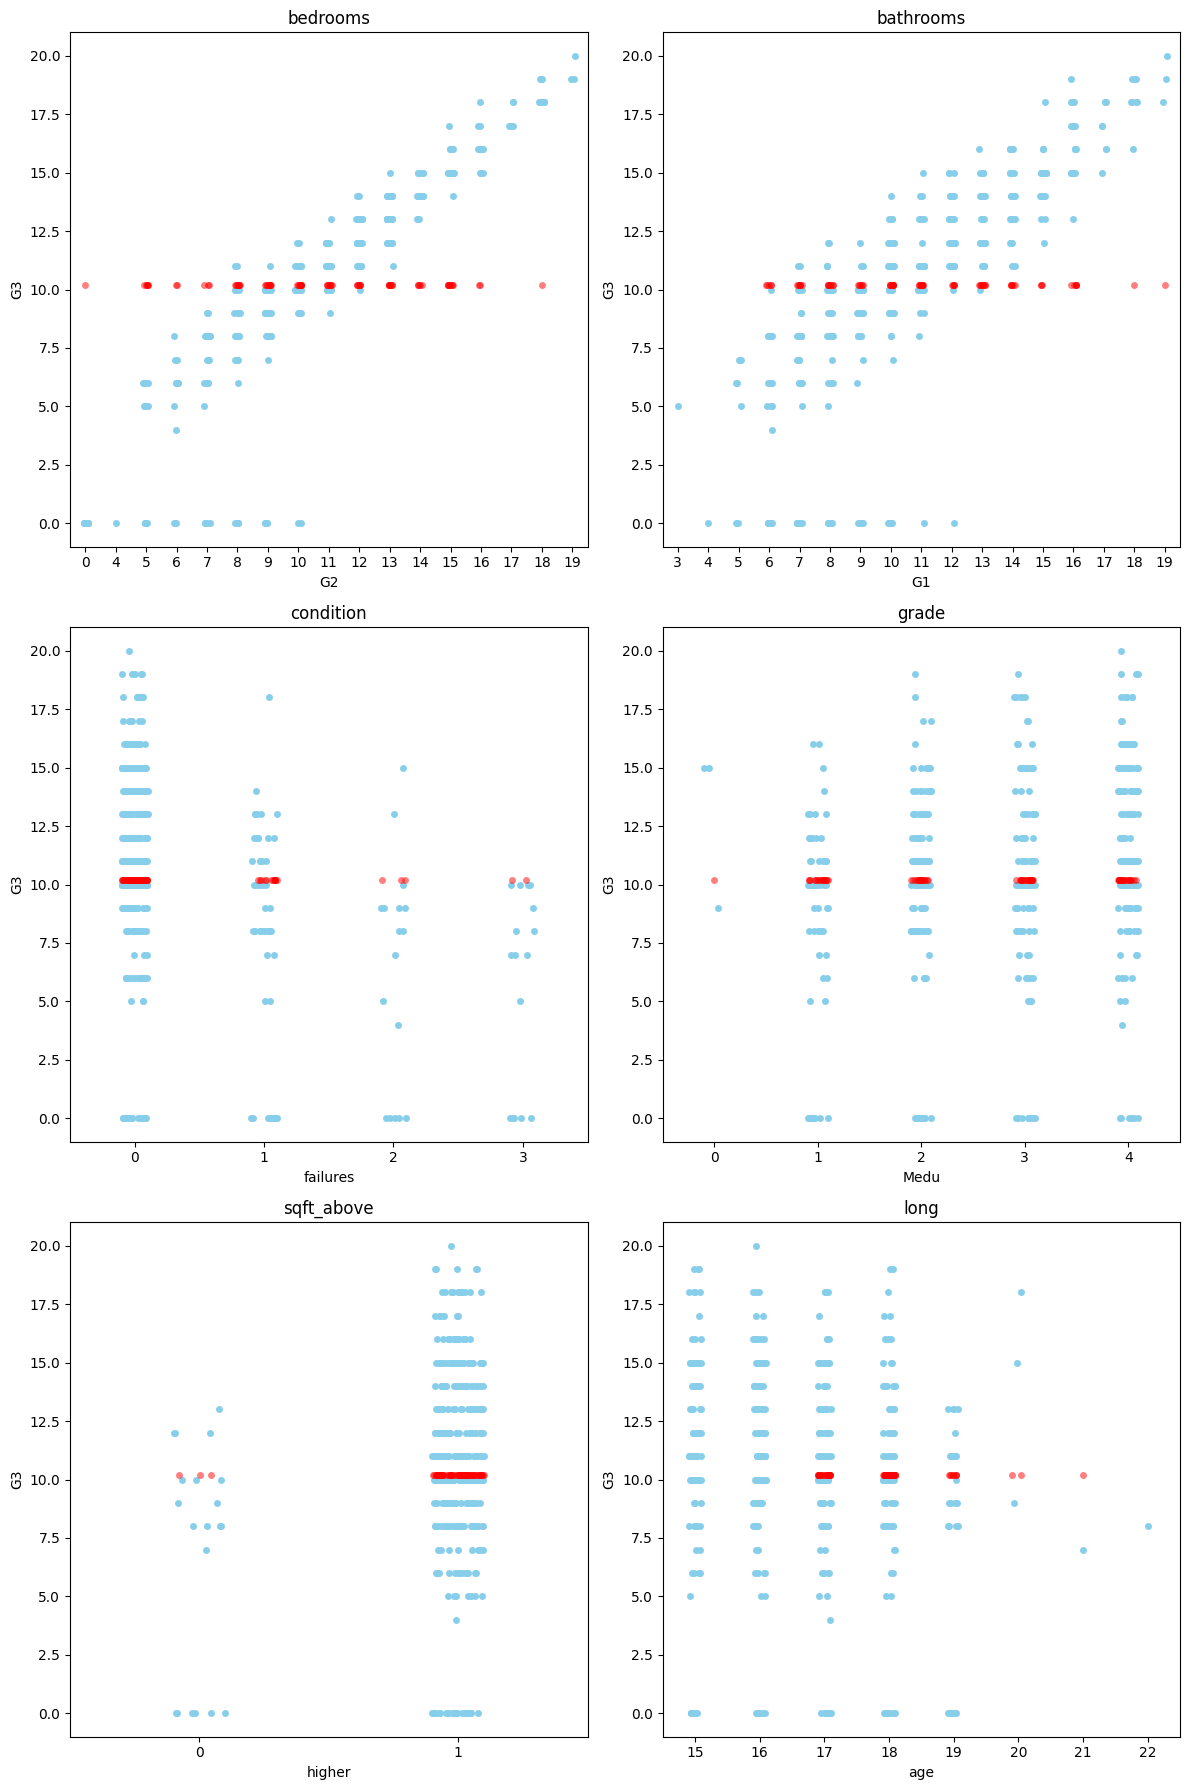

In [73]:
plt.figure(figsize=(12, 18))
# G2, G1, failures, Medu, higher, age
# First subplot 
plt.subplot(3, 2, 1)
sns.stripplot(x=data['G2'], y=data['G3'], color='skyblue')
sns.stripplot(x=data['G2'][len(X_train):], y=predictions, color='red', alpha=0.5)
plt.title('bedrooms')

# Second subplot 
plt.subplot(3, 2, 2)
sns.stripplot(x=data['G1'], y=data['G3'], color='skyblue')
sns.stripplot(x=data['G1'][len(X_train):], y=predictions, color='red', alpha=0.5)
plt.title('bathrooms')

# Third subplot 
plt.subplot(3, 2, 3)
sns.stripplot(x=data['failures'], y=data['G3'], color='skyblue')
sns.stripplot(x=data['failures'][len(X_train):], y=predictions, color='red', alpha=0.5)
plt.title('condition')

# Fourth subplot
plt.subplot(3, 2, 4)
sns.stripplot(x=data['Medu'], y=data['G3'], color='skyblue')
sns.stripplot(x=data['Medu'][len(X_train):], y=predictions, color='red', alpha=0.5)
plt.title('grade')

# Fifth subplot
plt.subplot(3, 2, 5)
sns.stripplot(x=data['higher'], y=data['G3'], color='skyblue')
sns.stripplot(x=data['higher'][len(X_train):], y=predictions, color='red', alpha=0.5)
plt.title('sqft_above')

# Sixth subplot
plt.subplot(3, 2, 6)
sns.stripplot(x=data['age'], y=data['G3'], color='skyblue')
sns.stripplot(x=data['age'][len(X_train):], y=predictions, color='red', alpha=0.5)
plt.title('long')

plt.tight_layout()
plt.show()
